# Exercise 4 : Linear Regression

## Name: Dion Toh Siyong
## Matriculation Number: U2021674D

#### Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

#### Read the data file "train.csv" using pd.read_csv()

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("Data type : ", type(houseData))
print("Data dims : ", houseData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [4]:
print(houseData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


# Problem 1 : Predicting SalePrice using GrLivArea

### a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship

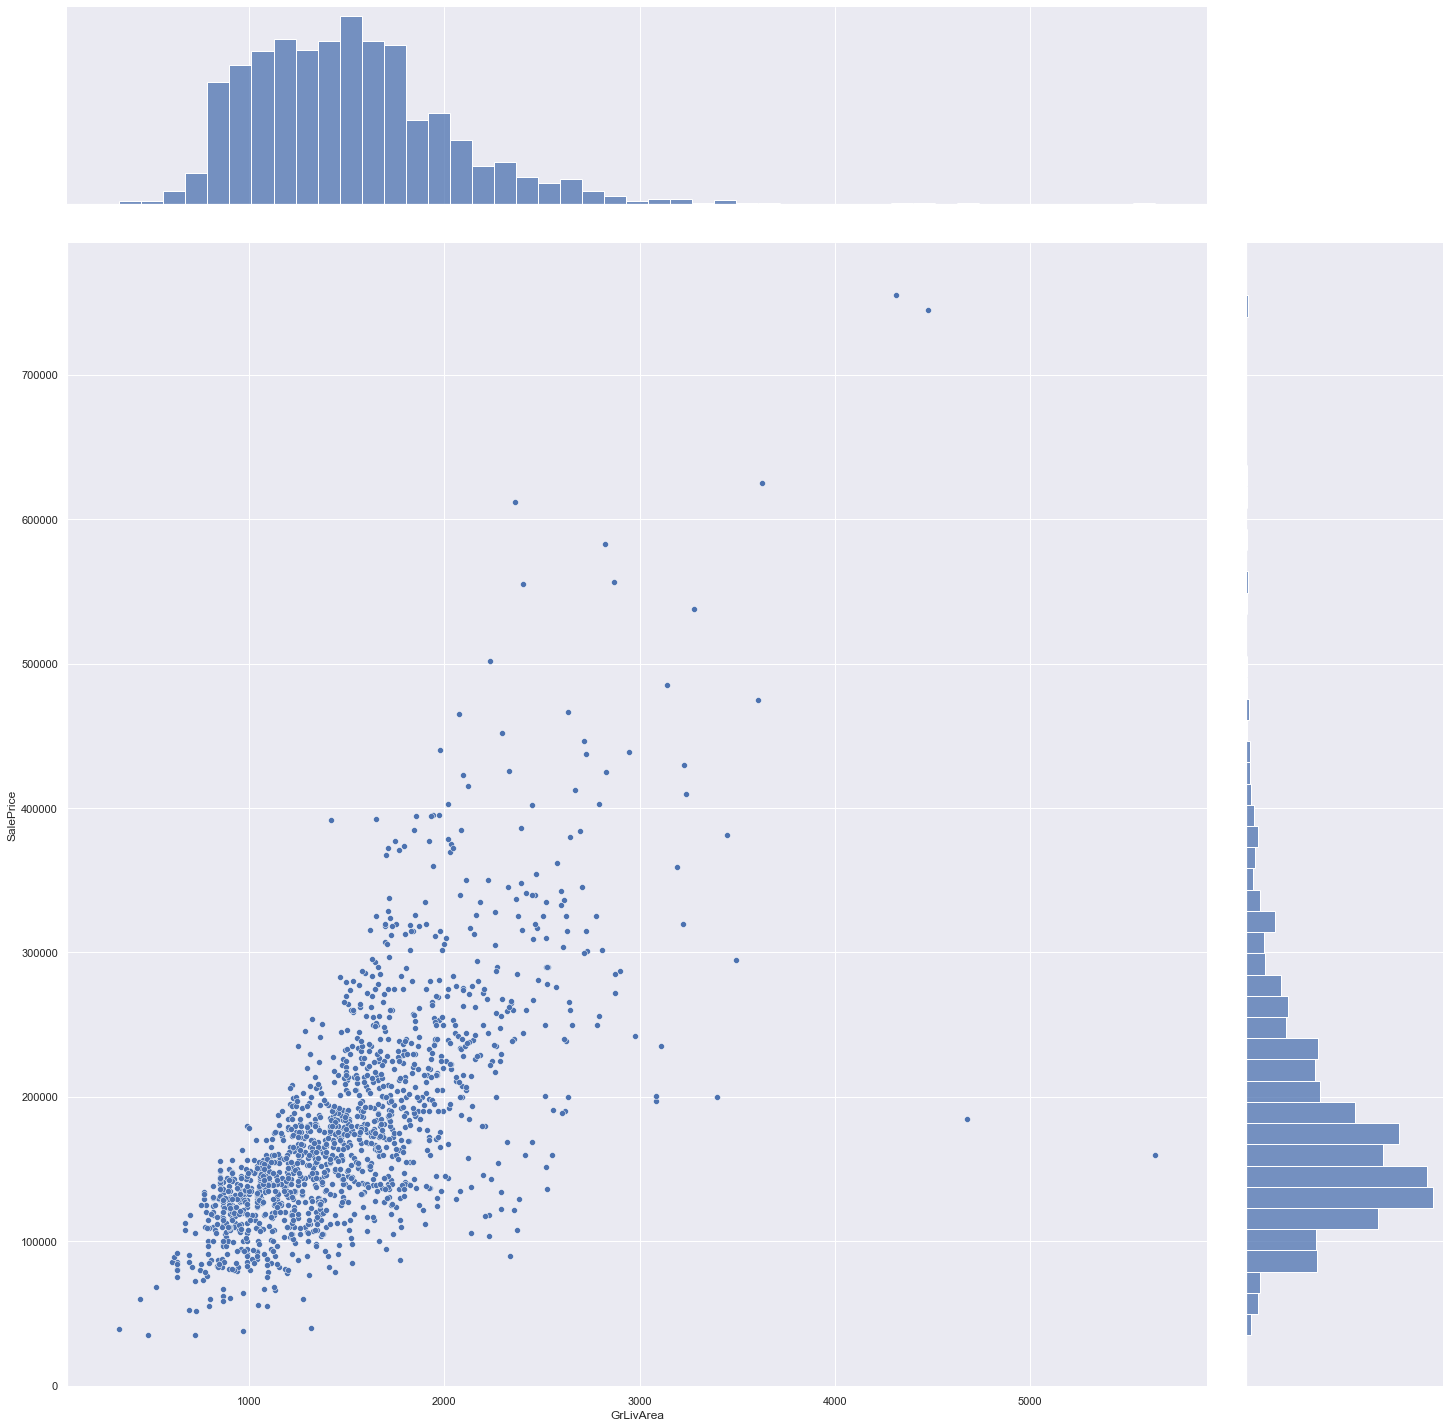

In [5]:
sb.jointplot(x = "GrLivArea", y = "SalePrice", data = houseData, height = 20)
plt.show()

#### Jointplot is a good plot to see the relationship between 2 variables. Just by looking at the plot above, we can see that there is relatively strong positive linear relation between SalePrice and GrLivArea.

### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [6]:
tempDF = houseData[['SalePrice', 'GrLivArea']]
display(tempDF.corr())

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


#### Correlation between SalePrice and GrLivArea is 0.71. A positive correlation. This strengthens my observation that there is a relatively strong positive correlation between SalePrice and GrLivArea.

### c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [8]:
train = houseData.sample(n=1100, random_state = 250)
test = houseData.drop(train.index)

#### Creating a train and test dataframes.
#### .sample() is used to get the "random" rows, and random_state is to ensure that whoever runs this code at any given time will get the same random data.

### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.

In [9]:
SalePrice_train = pd.DataFrame(train["SalePrice"])
GrLivArea_train = pd.DataFrame(train["GrLivArea"])
linreg = LinearRegression()
linreg.fit(GrLivArea_train, SalePrice_train)

LinearRegression()

#### GrLivArea_train will be used as the predictor, and SalePrice_train as the response to train the regression model.

### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot.

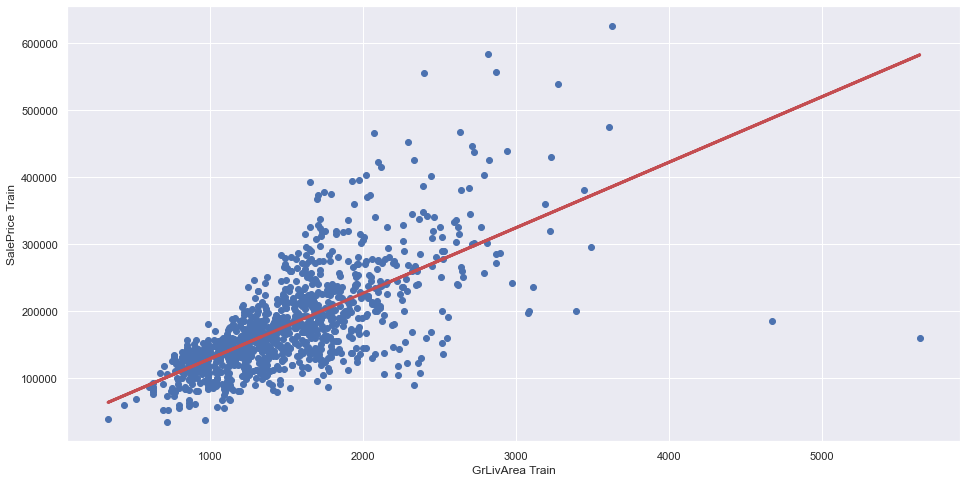

Intercept 	: b =  [30808.2316046]
Coefficients 	: a =  [[97.71713212]]


In [10]:
# Formula for the Regression line
regline_x = GrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * GrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.xlabel("GrLivArea Train")
plt.ylabel("SalePrice Train")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [11]:
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_train, SalePrice_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

SalePrice_pred = linreg.predict(GrLivArea_train)
mse = mean_sq_err(SalePrice_train, SalePrice_pred)
print("Mean Squared Error (MSE) \t:", mse)

R2, MSE = {}, {}
R2["GrLivArea"] = linreg.score(GrLivArea_train, SalePrice_train)
MSE["GrLivArea"] = mean_sq_err(SalePrice_train, SalePrice_pred)

Explained Variance (R^2) 	: 0.47199536958556365
Mean Squared Error (MSE) 	: 2993645717.7330327


### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.

In [12]:
SalePrice_test = pd.DataFrame(test["SalePrice"])
GrLivArea_test = pd.DataFrame(test["GrLivArea"])

In [13]:
SalePrice_predtest = linreg.predict(GrLivArea_test)

print(SalePrice_predtest[0])

[198588.54745872]


### i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy.

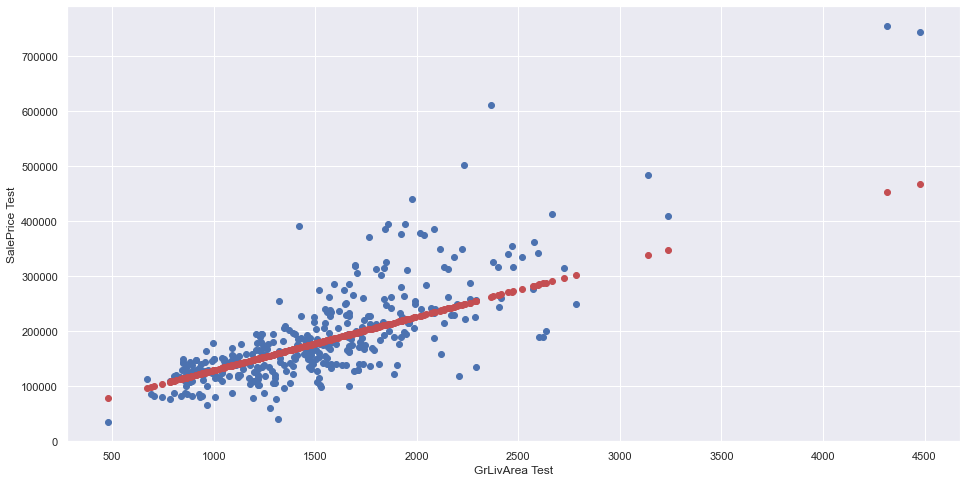

In [14]:
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_test, SalePrice_test)
plt.xlabel("GrLivArea Test")
plt.ylabel("SalePrice Test")
plt.scatter(GrLivArea_test, SalePrice_predtest, color = "r")
plt.show()

### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [15]:
print("Test Data Explained Variance (R^2) \t:", linreg.score(GrLivArea_test, SalePrice_test))

mse = mean_sq_err(SalePrice_test, SalePrice_predtest)
print("Test Data Mean Squared Error (MSE) \t:", mse)
#print("Test Data Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Test Data Explained Variance (R^2) 	: 0.5481886521383491
Test Data Mean Squared Error (MSE) 	: 3702369208.109554


Save data for later

In [16]:
R2_t, MSE_t = {}, {}
R2_t['GrLivArea'] = linreg.score(GrLivArea_test, SalePrice_test)
MSE_t['GrLivArea'] = mean_sq_err(SalePrice_test, SalePrice_predtest)

# Problem 2 : Predicting SalePrice using Other Variables

### Predicting SalePrice with LotArea:

a) Plot SalePrice against LotArea using any appropriate bivariate plot to note the strong linear relationship.

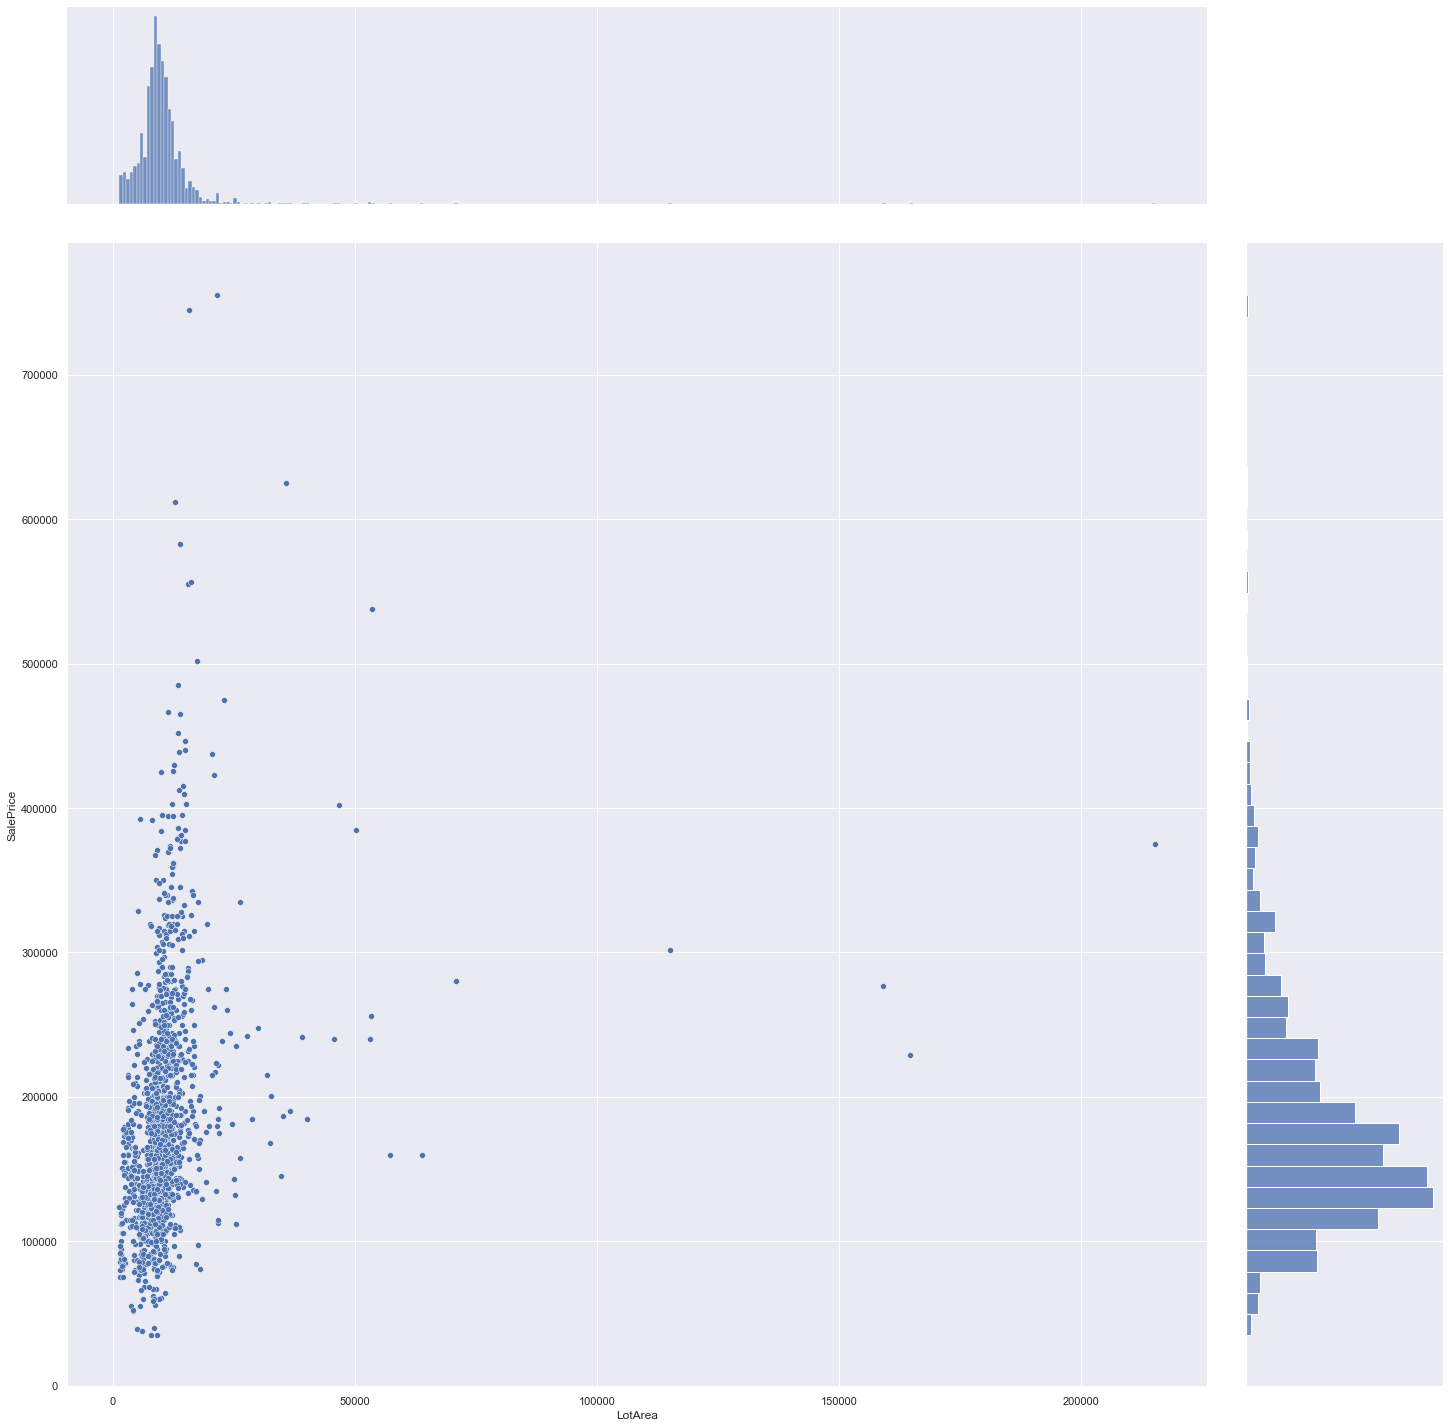

In [17]:
sb.jointplot(x = "LotArea", y = "SalePrice", data = houseData, height = 20)
plt.show()

#### We can see, from observation, that there's a relatively weak positive linear relationship between SalePrice and LotArea.

b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [18]:
tempDF = houseData[['SalePrice', 'LotArea']]
display(tempDF.corr())

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


#### There is about a 0.26 correlation coefficient of SalePrice and LotArea reinforcing our initial observation for a weak positive linear relationship between these two variables.

d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [19]:
LotArea_train = pd.DataFrame(train["LotArea"])
LotArea_test = pd.DataFrame(test["LotArea"])

e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using LotArea.

In [20]:
SalePrice_train = pd.DataFrame(train["SalePrice"])
LotArea_train = pd.DataFrame(train["LotArea"])
linreg = LinearRegression()
linreg.fit(LotArea_train, SalePrice_train)

LinearRegression()

#### We will use LotArea_train as the predictor and SalePrice_train as the response to train our linear regression model.

f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

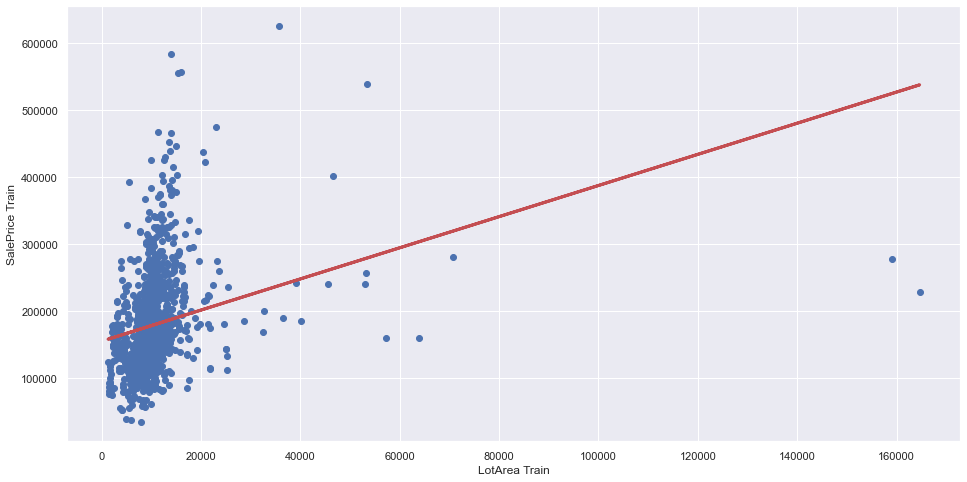

Intercept 	: b =  [154769.68878268]
Coefficients 	: a =  [[2.3242535]]


In [21]:
# Formula for the Regression line
regline_x = LotArea_train
regline_y = linreg.intercept_ + linreg.coef_ * LotArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(LotArea_train, SalePrice_train)
plt.xlabel("LotArea Train")
plt.ylabel("SalePrice Train")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [22]:
print("Explained Variance (R^2) \t:", linreg.score(LotArea_train, SalePrice_train))

SalePrice_pred = linreg.predict(LotArea_train)
mse = mean_sq_err(SalePrice_train, SalePrice_pred)
print("Mean Squared Error (MSE) \t:", mse)

R2["LotArea"] = linreg.score(LotArea_train, SalePrice_train)
MSE["LotArea"] = mean_sq_err(SalePrice_train, SalePrice_pred)

Explained Variance (R^2) 	: 0.07205342244617874
Mean Squared Error (MSE) 	: 5261210107.188992


h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable LotArea.

In [23]:
SalePrice_predtest = linreg.predict(LotArea_test)

print(SalePrice_predtest[0])

[176966.30969067]


i) Plot the predictions on a Scatterplot of LotArea and SalePrice in the Test Data to visualize model accuracy.

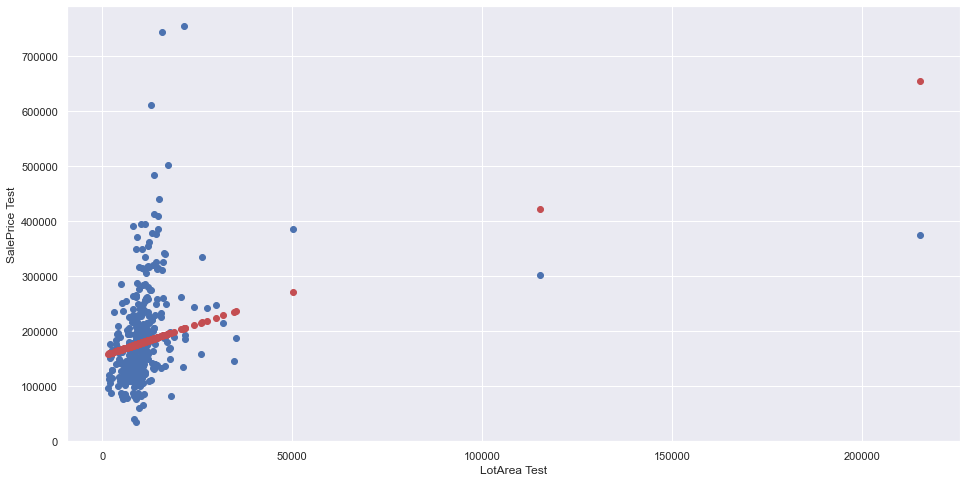

In [24]:
f = plt.figure(figsize=(16, 8))
plt.scatter(LotArea_test, SalePrice_test)
plt.xlabel("LotArea Test")
plt.ylabel("SalePrice Test")
plt.scatter(LotArea_test, SalePrice_predtest, color = "r")
plt.show()

j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [25]:
print("Test Data Explained Variance (R^2) \t:", linreg.score(LotArea_test, SalePrice_test))

mse = mean_sq_err(SalePrice_test, SalePrice_predtest)
print("Test Data Mean Squared Error (MSE) \t:", mse)
#print("Test Data Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Test Data Explained Variance (R^2) 	: 0.053851964034761446
Test Data Mean Squared Error (MSE) 	: 7753212422.065327


Save data for later.

In [26]:
R2_t['LotArea'] = linreg.score(LotArea_test, SalePrice_test)
MSE_t['LotArea'] = mean_sq_err(SalePrice_test, SalePrice_predtest)

### Predicting SalePrice with TotalBsmtSF:

a) Plot SalePrice against TotalBsmtSF using any appropriate bivariate plot to note the strong linear relationship.

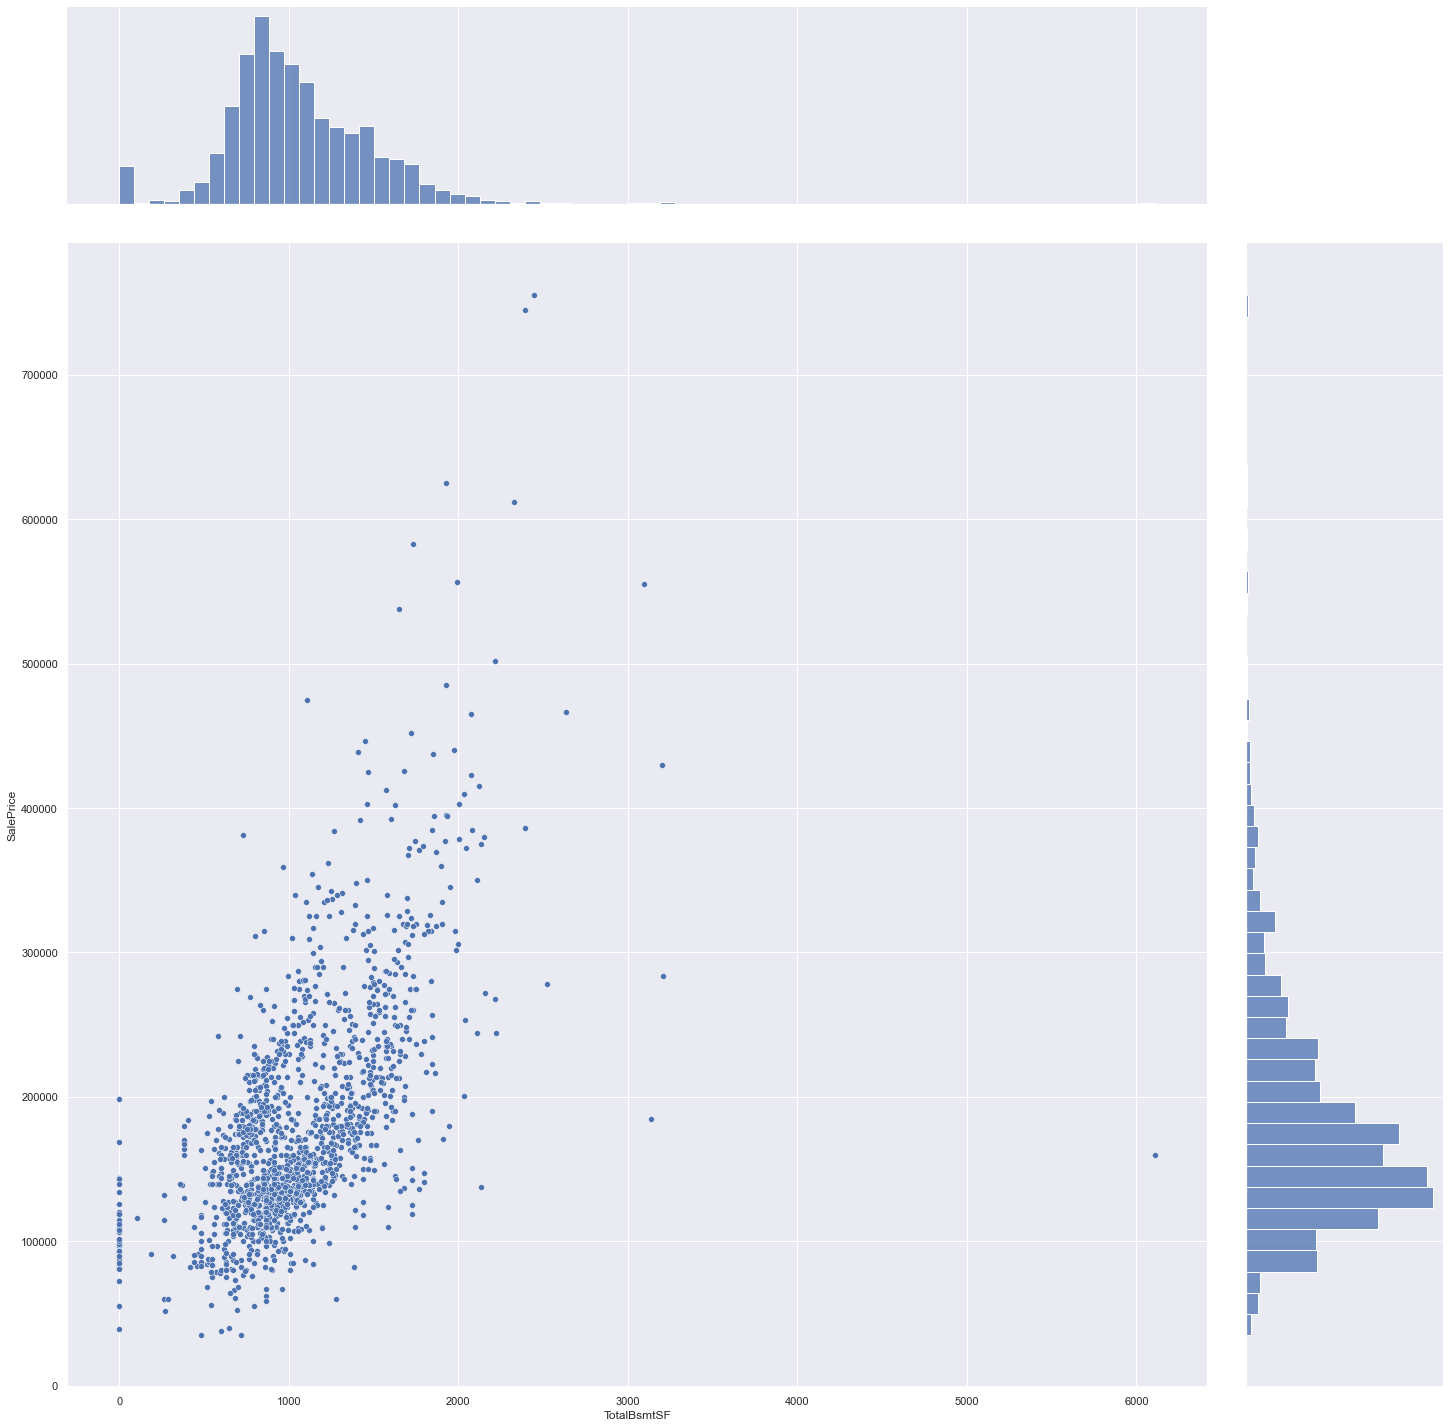

In [27]:
sb.jointplot(x = "TotalBsmtSF", y = "SalePrice", data = houseData, height = 20)
plt.show()

#### From observation, we can see that there is a relatively strong linear relation between TotalBsmtSF and SalePrice.

b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [28]:
tempDF = houseData[['SalePrice', 'TotalBsmtSF']]
display(tempDF.corr())

,SalePrice,TotalBsmtSF
SalePrice,1.000000,0.613581
TotalBsmtSF,0.613581,1.000000


#### There is about a 0.61 correlation coefficient of SalePrice and LotArea reinforcing our initial observation of a strong positive linear relationship between these two variables.

d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [29]:
TotalBsmtSF_train = pd.DataFrame(train["TotalBsmtSF"])
TotalBsmtSF_test = pd.DataFrame(test["TotalBsmtSF"])

e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using TotalBsmtSF.

In [30]:
SalePrice_train = pd.DataFrame(train["SalePrice"])
TotalBsmtSF_train = pd.DataFrame(train["TotalBsmtSF"])
linreg = LinearRegression()
linreg.fit(TotalBsmtSF_train, SalePrice_train)

LinearRegression()

#### We will use TotalBsmtSF_train as the predictor and SalePrice_train as the response to train our linear regression model.

f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

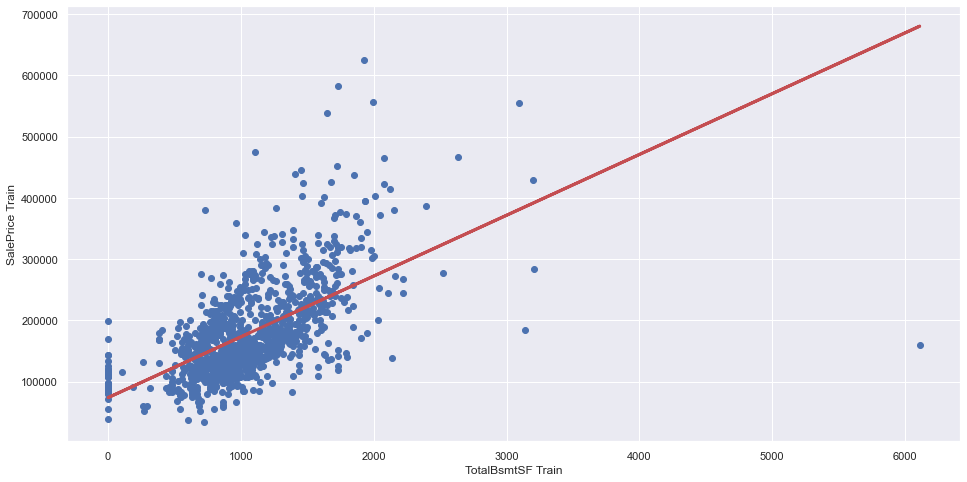

Intercept 	: b =  [73886.93829572]
Coefficients 	: a =  [[99.25946365]]


In [31]:
# Formula for the Regression line
regline_x = TotalBsmtSF_train
regline_y = linreg.intercept_ + linreg.coef_ * TotalBsmtSF_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_train, SalePrice_train)
plt.xlabel("TotalBsmtSF Train")
plt.ylabel("SalePrice Train")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [32]:
print("Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_train, SalePrice_train))

SalePrice_pred = linreg.predict(TotalBsmtSF_train)
mse = mean_sq_err(SalePrice_train, SalePrice_pred)
print("Mean Squared Error (MSE) \t:", mse)

R2["TotalBsmtSF"] = linreg.score(TotalBsmtSF_train, SalePrice_train)
MSE["TotalBsmtSF"] = mean_sq_err(SalePrice_train, SalePrice_pred)

Explained Variance (R^2) 	: 0.34554023089884334
Mean Squared Error (MSE) 	: 3710612696.0674834


h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable TotalBsmtSF.

In [33]:
SalePrice_predtest = linreg.predict(TotalBsmtSF_test)

print(SalePrice_predtest[0])

[148927.09281502]


i) Plot the predictions on a Scatterplot of TotalBsmtSF and SalePrice in the Test Data to visualize model accuracy.

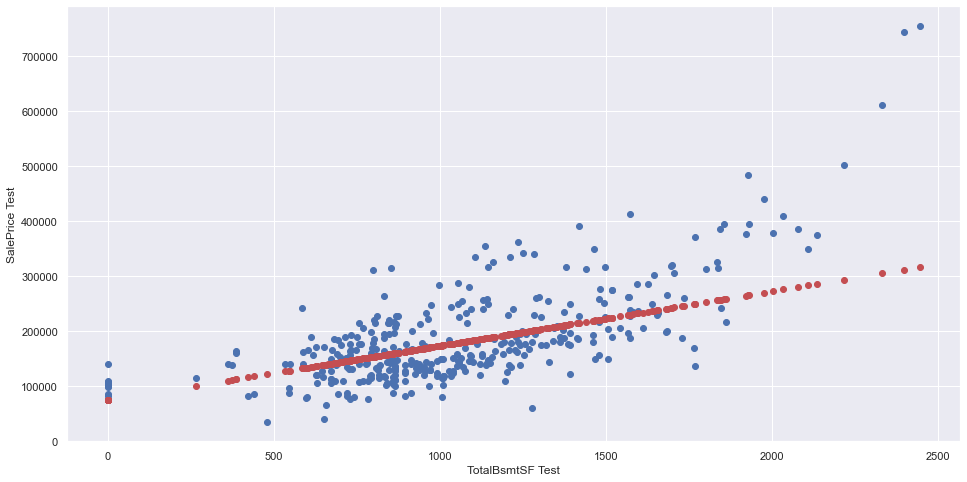

In [34]:
f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_test, SalePrice_test)
plt.xlabel("TotalBsmtSF Test")
plt.ylabel("SalePrice Test")
plt.scatter(TotalBsmtSF_test, SalePrice_predtest, color = "r")
plt.show()

j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [35]:
print("Test Data Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_test, SalePrice_test))

mse = mean_sq_err(SalePrice_test, SalePrice_predtest)
print("Test Data Mean Squared Error (MSE) \t:", mse)

R2_t['TotalBsmtSF'] = linreg.score(TotalBsmtSF_test, SalePrice_test)
MSE_t['TotalBsmtSF'] = mean_sq_err(SalePrice_test, SalePrice_predtest)

Test Data Explained Variance (R^2) 	: 0.4219202915483147
Test Data Mean Squared Error (MSE) 	: 4737075601.429644


### Predicting SalePrice with GarageArea:

a) Plot SalePrice against GarageArea using any appropriate bivariate plot to note the strong linear relationship.

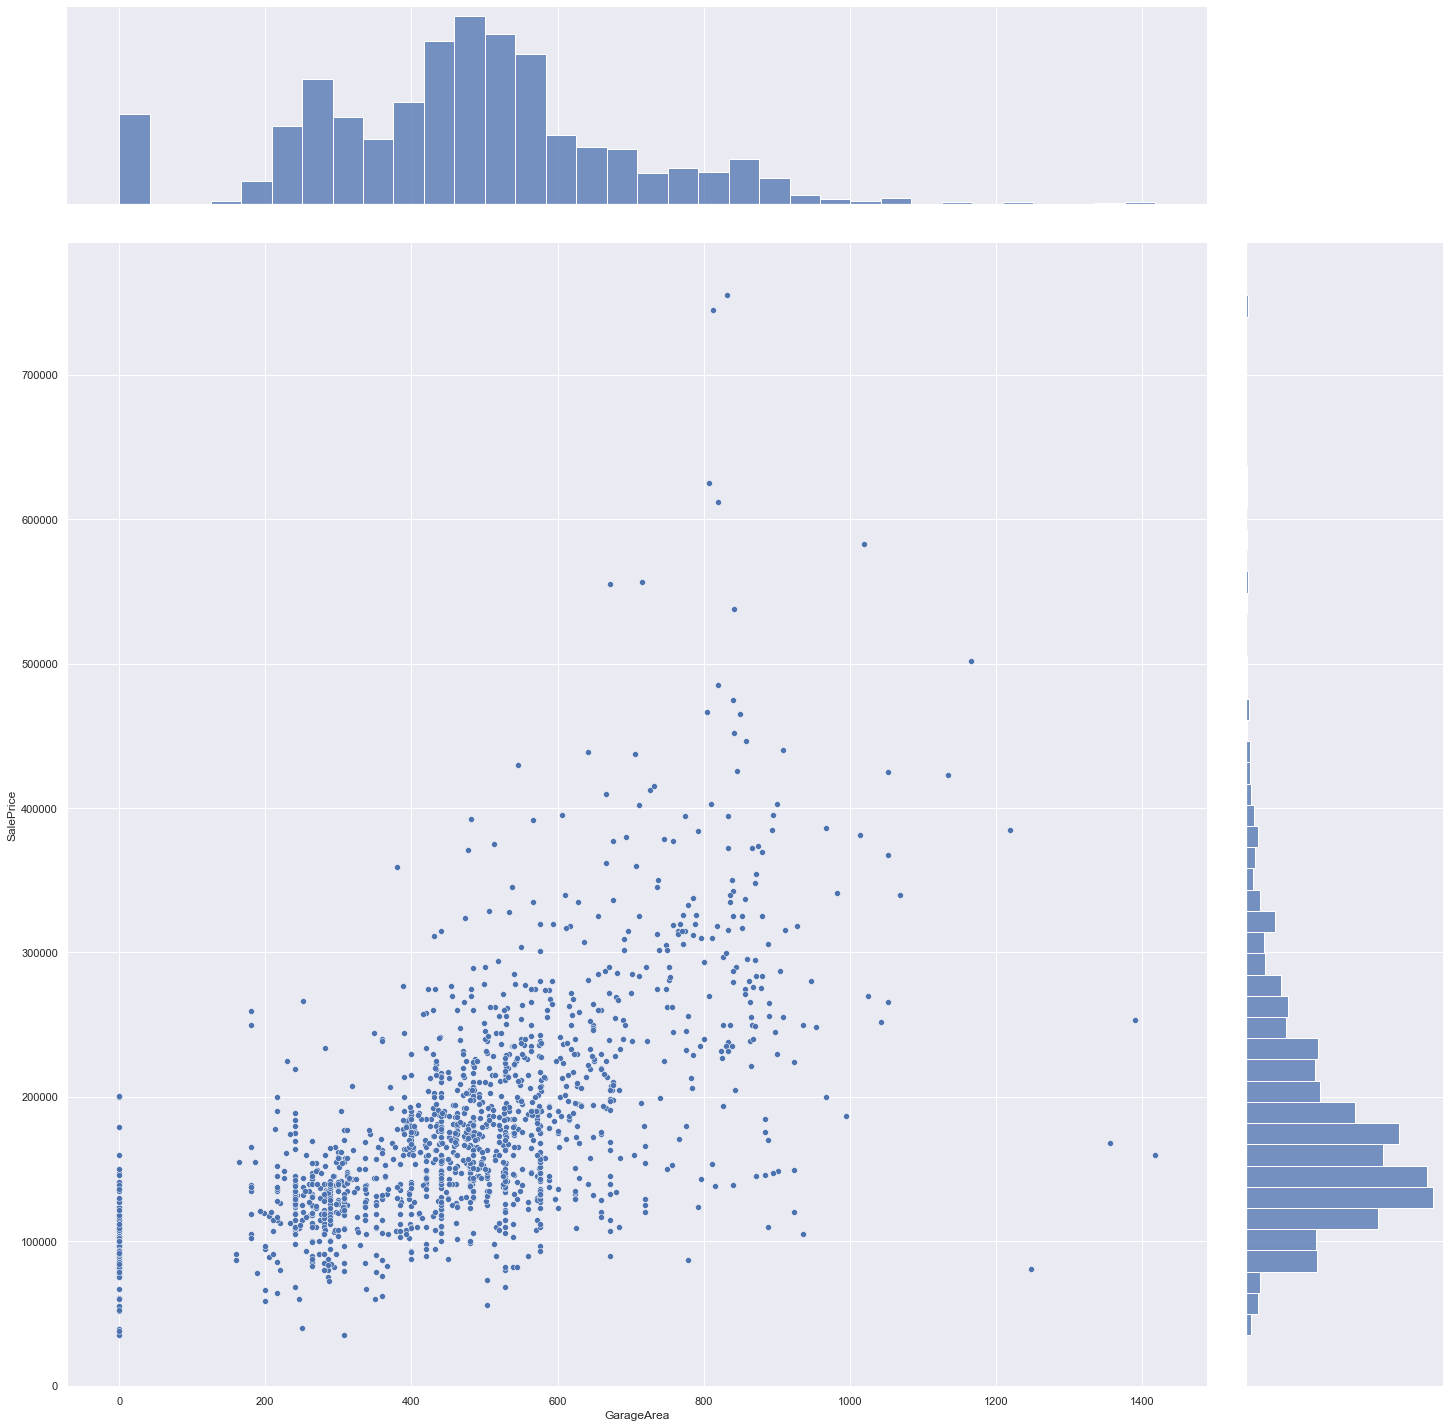

In [36]:
sb.jointplot(x = "GarageArea", y = "SalePrice", data = houseData, height = 20)
plt.show()

#### Based on observation, we can see that there is a relatively strong linear relationship between GarageArea and SalePrice.

b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [37]:
tempDF = houseData[['SalePrice', 'GarageArea']]
display(tempDF.corr())

,SalePrice,GarageArea
SalePrice,1.000000,0.623431
GarageArea,0.623431,1.000000


#### There is about a 0.62 correlation coefficient of SalePrice and LotArea reinforcing our initial observation of a strong positive linear relationship between these two variables.

d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [38]:
GarageArea_train = pd.DataFrame(train["GarageArea"])
GarageArea_test = pd.DataFrame(test["GarageArea"])

e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GarageArea.

In [39]:
linreg = LinearRegression()
linreg.fit(GarageArea_train, SalePrice_train)

LinearRegression()

#### We will use GarageArea_train as the predictor and SalePrice_train as the response to train our linear regression model.

f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

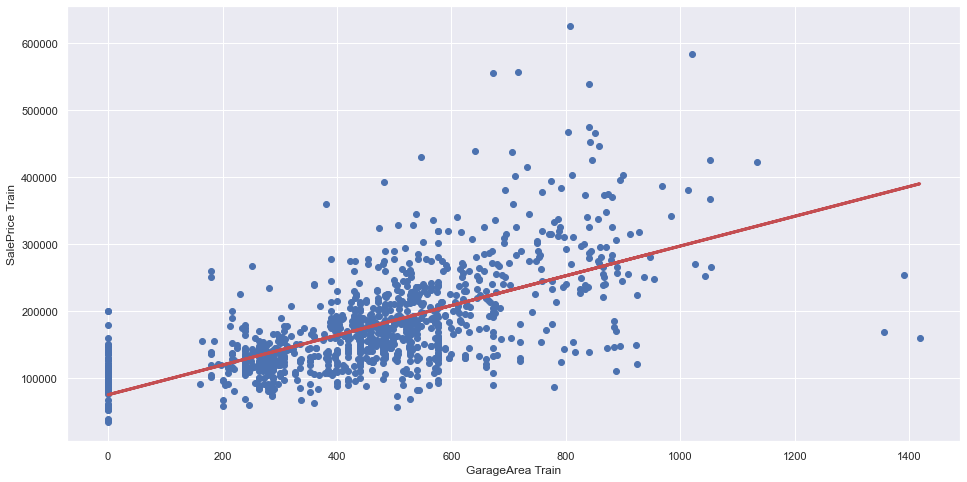

Intercept 	: b =  [74834.00366279]
Coefficients 	: a =  [[222.09446191]]


In [40]:
# Formula for the Regression line
regline_x = GarageArea_train
regline_y = linreg.intercept_ + linreg.coef_ * GarageArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_train, SalePrice_train)
plt.xlabel("GarageArea Train")
plt.ylabel("SalePrice Train")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [41]:
print("Explained Variance (R^2) \t:", linreg.score(GarageArea_train, SalePrice_train))

SalePrice_pred = linreg.predict(GarageArea_train)
mse = mean_sq_err(SalePrice_train, SalePrice_pred)
print("Mean Squared Error (MSE) \t:", mse)

R2["GarageArea"] = linreg.score(GarageArea_train, SalePrice_train)
MSE["GarageArea"] = mean_sq_err(SalePrice_train, SalePrice_pred)

Explained Variance (R^2) 	: 0.39750984741627826
Mean Squared Error (MSE) 	: 3415958802.942471


h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GarageArea.

In [42]:
SalePrice_predtest = linreg.predict(GarageArea_test)

print(SalePrice_predtest[0])

[217418.6482079]


i) Plot the predictions on a Scatterplot of GarageArea and SalePrice in the Test Data to visualize model accuracy.

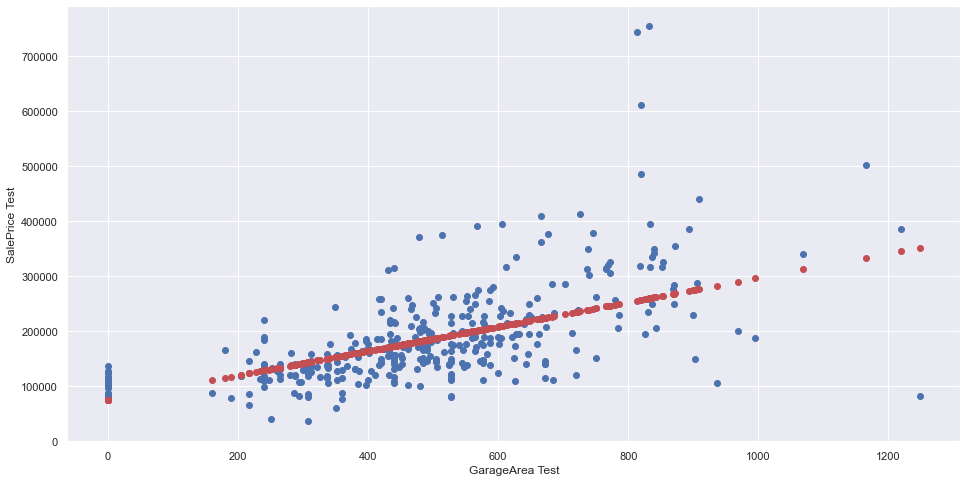

In [43]:
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_test, SalePrice_test)
plt.xlabel("GarageArea Test")
plt.ylabel("SalePrice Test")
plt.scatter(GarageArea_test, SalePrice_predtest, color = "r")
plt.show()

j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [44]:
print("Test Data Explained Variance (R^2) \t:", linreg.score(GarageArea_test, SalePrice_test))

mse = mean_sq_err(SalePrice_test, SalePrice_predtest)
print("Test Data Mean Squared Error (MSE) \t:", mse)

R2_t['GarageArea'] = linreg.score(GarageArea_test, SalePrice_test)
MSE_t['GarageArea'] = mean_sq_err(SalePrice_test, SalePrice_predtest)

Test Data Explained Variance (R^2) 	: 0.3629829129565094
Test Data Mean Squared Error (MSE) 	: 5220038096.147267


# Problem 3 : Best Uni-Variate Model to Predict SalePrice

### We will determine the best Uni-Variate Model based on the Explained Varience (R^2) and Mean Square Error (MSE). We will use the values thay we have found from Train and Test Data for the comparison.

In [45]:
print("Train Data")
print("Explained Varience (R^2)")
print("GrLivArea \t:", R2["GrLivArea"])
print("LotArea \t:", R2["LotArea"])
print("TotalBsmtSF \t:", R2["TotalBsmtSF"])
print("GarageArea \t:", R2["GarageArea"])
print("")
print("Mean Squared Error (MSE)")
print("GrLivArea \t:", MSE["GrLivArea"])
print("LotArea \t:", MSE["LotArea"])
print("TotalBsmtSF \t:", MSE["TotalBsmtSF"])
print("GarageArea \t:", MSE["GarageArea"])
print("")
print("Test Data")
print("Explained Varience (R^2)")
print("GrLivArea \t:", R2_t["GrLivArea"])
print("LotArea \t:", R2_t["LotArea"])
print("TotalBsmtSF \t:", R2_t["TotalBsmtSF"])
print("GarageArea \t:", R2_t["GarageArea"])
print("")
print("Mean Squared Error (MSE)")
print("GrLivArea \t:", MSE_t["GrLivArea"])
print("LotArea \t:", MSE_t["LotArea"])
print("TotalBsmtSF \t:", MSE_t["TotalBsmtSF"])
print("GarageArea \t:", MSE_t["GarageArea"])

Train Data
Explained Varience (R^2)
GrLivArea 	: 0.47199536958556365
LotArea 	: 0.07205342244617874
TotalBsmtSF 	: 0.34554023089884334
GarageArea 	: 0.39750984741627826

Mean Squared Error (MSE)
GrLivArea 	: 2993645717.7330327
LotArea 	: 5261210107.188992
TotalBsmtSF 	: 3710612696.0674834
GarageArea 	: 3415958802.942471

Test Data
Explained Varience (R^2)
GrLivArea 	: 0.5481886521383491
LotArea 	: 0.053851964034761446
TotalBsmtSF 	: 0.4219202915483147
GarageArea 	: 0.3629829129565094

Mean Squared Error (MSE)
GrLivArea 	: 3702369208.109554
LotArea 	: 7753212422.065327
TotalBsmtSF 	: 4737075601.429644
GarageArea 	: 5220038096.147267


### Based on the values of R^2 and MSE for each of the variables against SalePrice, I determined that the best Uni-Variate model to predict SalePrice would be GrLivArea as it has the highest R^2 value, as well as the lowest MSE value for both Train and Test data.
### Hence I conclude that, GrLivArea is the best variable in the predicition of SalePrice 